Cody Kane and Desmond Ramirez

Does Offence or Deffence win in College Basketball?

INTRODUCTION — Our goal is to decide whether offence or defence is more influential in a team's success in college basketball 

We chose this because we both enjoy watching college basketball. This was not our initial idea, but we struggled with finding the right data for the first idea, so we switched to comparing offence or defence, as we both talked about it and had different thoughts. 

Our research questions will be:

Question 1: Which has more influence, scoring more or getting scored on less, for a team trying to win the NCAA championship? 

Question 2: Will this change if we look at winning games against the top teams, or just winning games in general? 

Question 3: Since the game is constantly evolving and this year had some first in a long time events in the NCAA tournament, will our findings stand for this year ?


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns  
import statsmodels.formula.api as smf

In [19]:
#Reading in the dataset and setting a muli-index.
df = pd.read_csv('cbb.csv')
df.set_index(['TEAM', 'YEAR'], inplace = True)
df = df.sort_index()
df.fillna(0, inplace=True)
df

CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D  \
TEAM              YEAR                                                      
Abilene Christian 2014  Slnd  21   2   95.1  116.4   0.0889   47.2   56.4   
                  2015  Slnd  28   7   90.6  111.3   0.0854   47.3   55.3   
                  2016  Slnd  27   9   96.3  111.8   0.1529   50.5   54.6   
                  2017  Slnd  25  13   97.5  107.5   0.2450   52.5   52.8   
                  2018  Slnd  28  16   96.5  106.6   0.2423   50.4   51.4   
...                      ...  ..  ..    ...    ...      ...    ...    ...   
Youngstown St.    2019  Horz  30  12  103.8  111.0   0.3167   49.6   53.6   
                  2021  Horz  23  15  101.7  108.2   0.3275   48.7   54.3   
                  2022  Horz  32  19  103.1  109.4   0.3366   51.0   51.0   
                  2023  Horz  32  24  110.1  109.1   0.5274   54.7   51.3   
                  2024  Horz  28  22  106.6  104.2   0.5666   50.4   49.0   

                         TOR  TORD  ...   FTR  FTRD  2P_O  2P_D  3P_O  3P_D  \
TEAM              YEAR              ...                                       
Abilene Christian 2014  22.3  18.0  ...  42.3  48.3  42.3  56.8  37.3  37.1   
                  2015  19.8  20.8  ...  28.3  44.7  42.0  55.2  37.8  37.0   
                  2016  19.2  19.2  ...  40.3  46.5  48.4  54.2  36.3  36.9   
                  2017  21.0  21.4  ...  34.7  44.3  50.7  52.1  37.1  36.1   
                  2018  20.3  21.6  ...  31.5  43.2  51.9  52.3  31.8  33.2   
...                      ...   ...  ...   ...   ...   ...   ...   ...   ...   
Youngstown St.    2019  18.5  16.2  ...  23.1  38.5  48.5  55.0  34.1  34.2   
                  2021  16.7  18.7  ...  31.6  26.3  50.1  54.1  30.9  36.4   
                  2022  17.3  17.1  ...  30.4  30.3  50.8  50.7  34.1  34.3   
                  2023  15.6  17.9  ...  29.4  26.2  54.9  51.3  36.2  34.1   
                  2024  15.5  16.5  ...  29.3  30.7  52.2  47.9  31.9  34.0   

                        ADJ_T   WAB  POSTSEASON  SEED  
TEAM              YEAR                                 
Abilene Christian 2014   64.9 -14.1           0   0.0  
                  2015   64.0 -16.8           0   0.0  
                  2016   68.4 -14.4           0   0.0  
                  2017   67.1 -12.5           0   0.0  
                  2018   69.8 -11.3           0   0.0  
...                       ...   ...         ...   ...  
Youngstown St.    2019   68.7 -14.0           0   0.0  
                  2021   67.4  -9.3           0   0.0  
                  2022   66.6 -10.4           0   0.0  
                  2023   68.0  -5.3           0   0.0  
                  2024   68.8  -6.0           0   0.0  

[3885 rows x 22 columns]

Research Question 1: Does a better offence or defence win a championship?

We will group teams by their postseason success and compare average offensive and defensive efficiency. We choose to look at efficiencies. The reason is that it seems to be the best metric of how well a team performs, as it measures the amount scored per 100 possessions (ADJOE) or the amount scored per 100 defensive possessions (ADJDE). This statistic seems to best cover all other statistics, this shows the impact of scoring or getting scored on.

In [20]:
OEgroups = df.groupby(by = 'POSTSEASON')['ADJOE']
DEgroups = df.groupby(by = 'POSTSEASON')['ADJDE']
meanOE = OEgroups.mean()
meanDE = DEgroups.mean()
df.groupby('POSTSEASON')[['ADJOE', 'ADJDE']].mean()
#We can see defence does not seem to help win as much as offence.

,ADJOE,ADJDE
POSTSEASON,,
0,101.410073,104.904463
2ND,119.572727,91.618182
Champions,121.881818,91.218182
E8,116.575000,93.406818
F4,117.013636,93.854545
R32,112.730114,95.431250
R64,108.941761,98.533523
R68,105.979545,102.065909
S16,115.236364,93.636364


In [21]:
print(df['ADJOE'].describe())
print(df['ADJDE'].describe())
#This shows the stats have a similar average and that the defence rating is not lower because it is just a different statisitic. Same is roughly true
#for the mins and maxs.

count    3885.000000
mean      103.339743
std         7.315009
min        76.600000
25%        98.300000
50%       103.000000
75%       108.100000
max       129.100000
Name: ADJOE, dtype: float64
count    3885.000000
mean      103.341519
std         6.490684
min        84.000000
25%        98.600000
50%       103.500000
75%       108.000000
max       124.000000
Name: ADJDE, dtype: float64


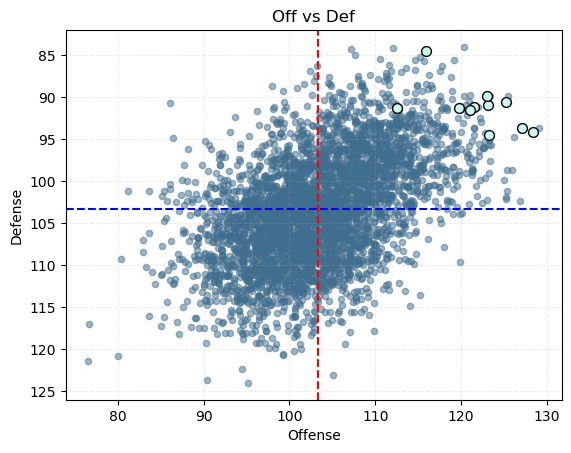

In [ ]:
#plt.scatter(df['ADJOE'], df['ADJDE'])
#plt.scatter(df['ADJOE'], df['ADJDE'], alpha=0.5)

# Average of offense and defense
avgOff = df['ADJOE'].mean()
avgDef = df['ADJDE'].mean()

plt.scatter(df['ADJOE'], df['ADJDE'], alpha=0.5, s=20, color='#406E8E')

# highlighting the champions
highlight = df[df['POSTSEASON'] == 'Champions']
plt.scatter(highlight['ADJOE'], highlight['ADJDE'], color='#CBF7ED',s=50, edgecolors='black')

plt.axvline(avgOff, color='red', linestyle='--')
plt.axhline(avgDef, color='blue', linestyle='--')
plt.gca().invert_yaxis()
plt.xlabel('Offense')
plt.ylabel('Defense')
plt.title('Off vs Def')
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()
#fit line

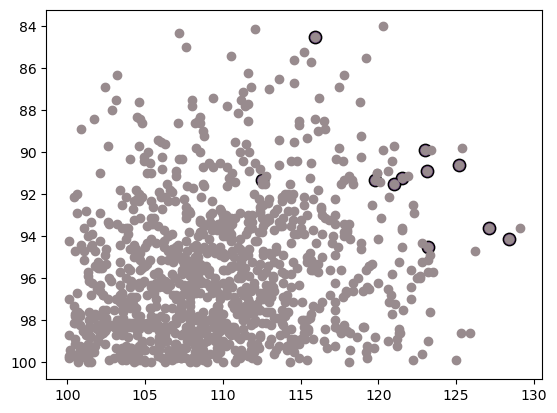

In [23]:
# Making a dataframe where its only data thats above the averages
aboveAVG = df[(df['ADJOE'] > 100) & (df['ADJDE'] <= 100)]
aboveAVG

# highlighting the champions
highlight = df[df['POSTSEASON'] == 'Champions']
plt.scatter(highlight['ADJOE'], highlight['ADJDE'], color='#613F75',s=80, edgecolors='black')

plt.scatter(aboveAVG['ADJOE'], aboveAVG['ADJDE'], color = '#988B8E')
plt.gca().invert_yaxis()
plt.show()


We see in this graph that the teams near the edges are usually winning the championship, which makes a lot of sense as those will be the best teams. But, it looks like the heavy offensive teams are winning more than the defensive teams. So we want to compare the actual counts of postseason success of the top percentiles of each statistic. 

In [24]:
# Here is comparing top x percent of each stat to the counts of the postseason success with that percentile offence/defence eff. 
x = 1
x0 = 100 - x
offence = df[df["ADJOE"] > np.percentile(df["ADJOE"], x0)]
deffence = df[df["ADJDE"] < np.percentile(df["ADJDE"], x)]
print(offence['POSTSEASON'].value_counts())
print(deffence['POSTSEASON'].value_counts())


POSTSEASON
R32          7
E8           7
Champions    6
R64          6
F4           4
2ND          4
S16          4
R68          1
Name: count, dtype: int64
POSTSEASON
S16          11
R64           8
R32           7
E8            4
F4            3
2ND           2
0             2
Champions     1
Name: count, dtype: int64


In [25]:
#This shows how many the two have in common. 
pd.merge(offence.reset_index(), deffence.reset_index())['POSTSEASON'].value_counts()

Series([], Name: count, dtype: int64)

Conclusion: Looking at postseason success, it would appear that having a top-tier offence is more likely to win championships than having a top-tier defence. Looking at both the top 1 and 2 percentiles, there is a very noticeable difference in the number of teams winning in the tournament.

R2: Because for most teams playing college basketball, a national championship is a far-fetched dream. Instead of using postseason success, we will see if this holds while using other metrics of success, such as wins and wins above the bubble. 

We will make a heat map to see which stats are the most impactful, since this is a numeric variable for our measurement of success, it allows us to do this. Since we can easily compare the dependent variables, we will decide the most impactful then create a regression model that will be able to calculate the most impactful stats. 

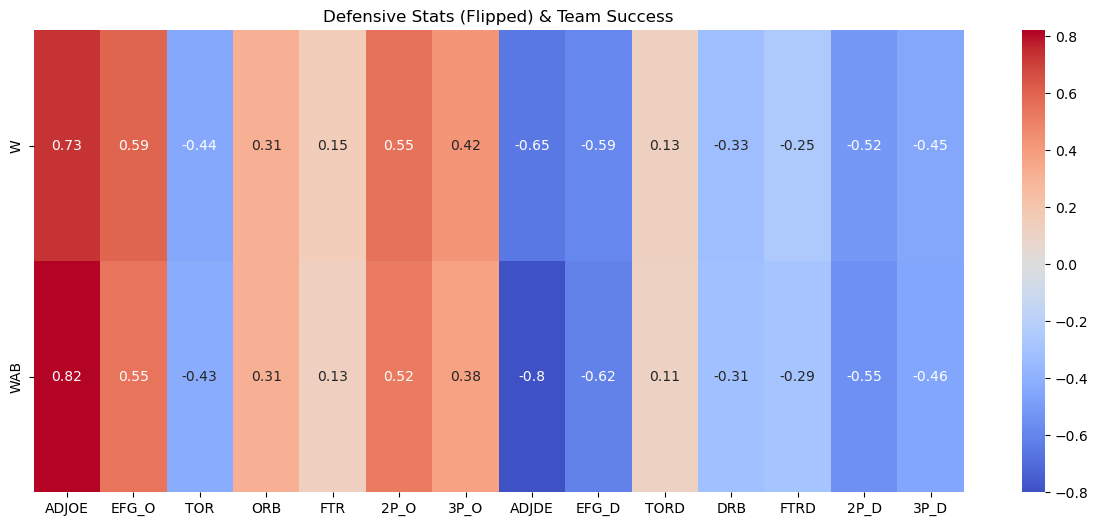

In [26]:
successColumn = ['W', 'WAB']
defenseColumn = [ 'ADJOE','EFG_O','TOR','ORB','FTR','2P_O','3P_O',  # Offensive stats
    'ADJDE','EFG_D','TORD','DRB','FTRD','2P_D','3P_D']
defenseSuccess = df[defenseColumn + successColumn].corr().loc[successColumn, defenseColumn]

# Plot
plt.figure(figsize=(15, 6))
sns.heatmap(defenseSuccess, annot=True, cmap='coolwarm', center=0)
plt.title("Defensive Stats (Flipped) & Team Success")
plt.show()

We are choosing these 6 stats 'ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD' because 'ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', have the four most extreme values and then TOR and TORD because TOR has the next extreme besides the 2 and 3 point stats, which we decided against because it would correlate too much with effective field goal percentage. 

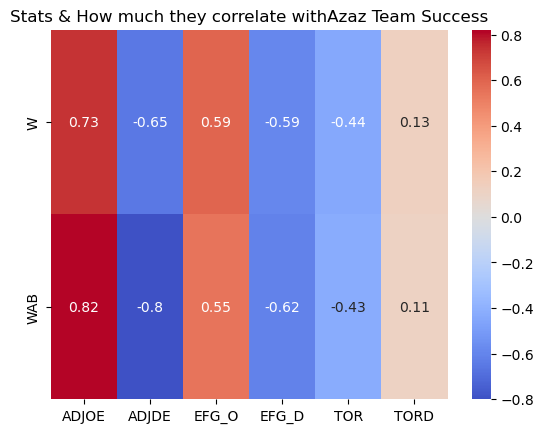

In [27]:
# Putting defense stats into a column, Putting wins stats into a column
defenseColumn = [ 'ADJOE', 'ADJDE','EFG_O','EFG_D', 'TOR','TORD']
successColumn = ['W', 'WAB']

# Correlation between success and defense stats
defenseSuccess = df[defenseColumn + successColumn].corr().loc[successColumn, defenseColumn]

# Plot
sns.heatmap(defenseSuccess, annot=True, cmap='coolwarm', center=0)
plt.title("Stats & How much they correlate withAzaz Team Success")
plt.show()

In smaller settings, the same variables appear to still be the most determinants.

We will now create a regression model to try to explain what these variables are doing to the number of wins. 

In [28]:
#Multivarite OLS regression model explaining wins with the varibles in X
X = df[[ 'ADJOE', 'ADJDE','EFG_O','EFG_D', 'TOR','TORD']]  
y = df['W'] 
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0150      2.313      1.736      0.083      -0.520       8.550
ADJOE          0.2880      0.014     19.899      0.000       0.260       0.316
ADJDE         -0.0225      0.016     -1.375      0.169      -0.054       0.010
EFG_O          0.6014      0.025     23.663      0.000       0.552       0.651
EFG_D         -0.9517      0.031    -31.005      0.000      -1.012      -0.892
TOR           -0.4704      0.031    -15.339      0.000      -0.531      -0.410
TORD           0.5963      0.026     22.965      0.000       0.545       0.647


We realised that this was incredibly hard to interpret and that it would be a better idea to standardise all of the variables, as each of them has a different scale. 

In [29]:
#standerizing the varibles so each one is a messure of standered deviations from the mean 
df['cADJOE'] = (df['ADJOE'] - df['ADJOE'].mean())/df['ADJOE'].std()
df['cADJDE'] = -(df['ADJDE'] - df['ADJDE'].mean())/df['ADJDE'].std()
df['cEFG_O'] = (df['EFG_O'] - df['EFG_O'].mean())/df['EFG_O'].std()
df['cEFG_D'] = -(df['EFG_D'] - df['EFG_D'].mean())/df['EFG_D'].std()
df['cTOR'] = -(df['TOR'] - df['TOR'].mean())/df['TOR'].std()
df['cTORD'] = (df['TORD'] - df['TORD'].mean())/df['TORD'].std()
model = smf.ols('W ~ cADJOE + cEFG_O + cTOR + cADJDE + cEFG_D + cTORD', data=df).fit()
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0754      0.051    315.700      0.000      15.976      16.175
cADJOE         2.1066      0.106     19.899      0.000       1.899       2.314
cEFG_O         1.8522      0.078     23.663      0.000       1.699       2.006
cTOR           1.0090      0.066     15.339      0.000       0.880       1.138
cADJDE         0.1458      0.106      1.375      0.169      -0.062       0.354
cEFG_D         2.7172      0.088     31.005      0.000       2.545       2.889
cTORD          1.3650      0.059     22.965      0.000       1.248       1.481


This model would disagree with the heatmaps in which the individual stat is the most impactful. However, we standardised after we did the heatmap, and we expected a little difference. This model does not value defensive efficiency at all, but all the offensive stats were fairly impactful, while only 2 of the defensive ones were. Which is what the heat map agrees with, but which stat changes.

In [30]:
#We will predict new data, giving all of the deffencive stats one standered deviation above the average while keeping offence at the average,
#Then We will do the opposite for offence, showing what this model thinks would win more games as a team. 
#Deffence will be 0 and offence will be 1
new_data = pd.DataFrame({
    'cADJOE': [0, 1],
    'cEFG_O': [0, 1],
    'cTOR': [0, 1],
    'cADJDE': [1, 0],
    'cEFG_D': [1, 0],
    'cTORD': [1, 0 ]
})

# Predictions
predictions = model.predict(new_data)
print(predictions)

0    20.303372
1    21.043229
dtype: float64


This also proves that offence is (barely) more impactful than deffence since we can see in the predictions of the model with a better offence are winning more games. Then we will use the same method to confirm using WAB stays the same as that is a messaure of how much a team wins against the top teams. 

In [31]:
model = smf.ols('WAB ~ cADJOE + cEFG_O + cTOR + cADJDE + cEFG_D + cTORD', data=df).fit()
print(model.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.6400      0.036   -211.768      0.000      -7.711      -7.569
cADJOE         3.6024      0.075     48.030      0.000       3.455       3.749
cEFG_O         0.4691      0.055      8.458      0.000       0.360       0.578
cTOR           0.2013      0.047      4.319      0.000       0.110       0.293
cADJDE         2.7551      0.075     36.677      0.000       2.608       2.902
cEFG_D         0.8442      0.062     13.596      0.000       0.722       0.966
cTORD          0.5286      0.042     12.553      0.000       0.446       0.611


This model is very different from the first one we created. This explains how certain metrics matter more against the top teams, and this also validates our first tests as it confirms that "ADJOE" and "ADJDE" are the most influential against other top teams, meaning that we used the right statistics to compare the postseason success. 

In [32]:
#setting variables of the predicted teams, in this one offence will be index 0 and deffence will be 1. 
new_data = pd.DataFrame({
    'cADJOE': [2, 1],
    'cEFG_O': [2, 1],
    'cTOR': [2, 1],
    'cADJDE': [1, 2],
    'cEFG_D': [1, 2],
    'cTORD': [1, 2,]
})

# Predictions
predictions = model.predict(new_data)
print(predictions)

0    5.033637
1    4.888753
dtype: float64


Using WAB does change the model and which stats it values the most, especially efficiencies, as it now values both of them equally. Being the most efficient and scoring more will win games. Overall, changing how we defined success did not change our result, but it did show more specifically what can influence winning the most. We think that using wins provided a better insight into can makes a good team, but we still think that how a team does in the postseason is the most important, as it is how a team can win a national title and what decides the final team rankings of the year. 

R3: Do these findings hold for this year's championship and top-performing teams? 

In [33]:
DF = pd.read_csv("Defense25.csv")
OF = pd.read_csv("Offense25.csv")
MM = pd.read_csv("MarchM25.csv")
MM

,Region,Seed,Team
0,South,1,Auburn
1,South,2,Michigan State
2,South,3,Iowa State
3,South,4,Texas A&M
4,South,5,Michigan
...,...,...,...
59,West,12,Colorado State
60,West,13,Grand Canyon
61,West,14,Montana
62,West,15,Omaha


In [34]:
#Combined and dropped duplicate columns
#Games isnt needed along with rank since the data didnt rank them by any caterogry
DF25 = pd.merge(DF, OF, on="TEAM")
DF25 = DF25.drop(columns=["RANK", "GM","G","RANk"])
DF25

,TEAM,OPP FG,OPP FGA,OPP FG%,FGM,3PG,FGA,PCT,Unnamed: 7
0,Houston,786,2054,38.267,1070,326,2384,0.517,NaN
1,San Diego St.,654,1709,38.268,789,239,1784,0.509,NaN
2,George Mason,778,2031,38.306,869,250,1908,0.521,NaN
3,Duke,879,2287,38.435,1129,394,2289,0.579,NaN
4,South Alabama,702,1822,38.529,814,273,1835,0.518,NaN
...,...,...,...,...,...,...,...,...,...
348,Toledo,982,2018,48.662,937,193,2019,0.512,NaN
349,Miami (FL),908,1836,49.455,849,223,1849,0.519,NaN
350,Canisius,876,1770,49.492,729,254,1673,0.512,NaN
351,Mississippi Val.,898,1798,49.944,610,140,1568,0.434,NaN


In [35]:
#Added a net efficiency whre off - def. Making it if pos it means the team was better at OFF. Negative means there defense is better 
#Closer to zero means its balanced
DF25["OFFvsDEF"] = (DF25["PCT"]*100) - (DF25["OPP FG%"])
print(DF25[["TEAM","OFFvsDEF"]])

                 TEAM  OFFvsDEF
0             Houston    13.433
1       San Diego St.    12.632
2        George Mason    13.794
3                Duke    19.465
4       South Alabama    13.271
..                ...       ...
348            Toledo     2.538
349        Miami (FL)     2.445
350          Canisius     1.708
351  Mississippi Val.    -6.544
352      Prairie View    -1.608

[353 rows x 2 columns]


In [36]:
#Filtered the data to show the net efficiency of the teams that made the bracket
Tournament25 = DF25[DF25["TEAM"].isin(MM["Team"])]
Top64 = Tournament25[["TEAM", "OFFvsDEF"]].sort_values(by="OFFvsDEF", ascending=False)
Top64


,TEAM,OFFvsDEF
3,Duke,19.465
26,Liberty,17.798
12,UC San Diego,15.831
15,Florida,14.916
51,Creighton,14.687
34,Yale,14.260
30,Auburn,14.115
100,Alabama,14.032
6,Tennessee,13.907
128,BYU,13.852


We realised that this way to measure the offence vs defence was skewed, as most teams that win games will also make more baskets than the other team so we decided to compare the best at shooting % and shooting % allowed. 

In [50]:
x = 5
x0 = 100 - x

#Finding the percntile of high efficent offense
offence = DF25[DF25["PCT"] > np.percentile(DF25["PCT"], x0)]

#Finding the percntile of the temas that allow the fewest shots
deffence = DF25[DF25["OPP FG%"] < np.percentile(DF25["OPP FG%"], x)]

print(offence['TEAM'])
print(deffence['TEAM'])

# Florida , Houston
# Duke, Auburn
# Michigan St , Alabama , Texas Tech , Tennesse

3                  Duke
23              Bradley
26              Liberty
51            Creighton
81          Saint Louis
100             Alabama
104          High Point
128                 BYU
184         Chattanooga
208    North Dakota St.
217          Miami (OH)
224      Washington St.
240             Cornell
282             Montana
299          Wright St.
335                Iowa
Name: TEAM, dtype: object
0             Houston
1       San Diego St.
2        George Mason
3                Duke
4       South Alabama
5             Hofstra
6           Tennessee
7                 VCU
8           App State
9           UC Irvine
10     New Mexico St.
11        Little Rock
12       UC San Diego
13    St. John's (NY)
14     UNC Greensboro
15            Florida
16             Kansas
17           Michigan
Name: TEAM, dtype: object


In [38]:
offenseS = set(offence["TEAM"])
defenseS = set(deffence["TEAM"])

both = offenseS.intersection(defenseS)
print(both)

{'Duke'}


Earlier, we found that having a better offence can lead to being a more successful team. The champion this year was Florida, and the runner-up was Houston. These teams were in the top 5% of lowest shot percentage allowed, but were not in the top 5% in shooting percentage. So our statement does not still stand for the 24-25 season that having a more effective offence is more impactful than the defence, as the final 2 teams did not match this. Auburn did not make either the top 5%, and Duke made both. Both were eliminated in the final 4, so that proves nothing. Two of the Elite 8 teams were in the top 5% of defence while none were in the offence top 5%. This shows that this year, our previous findings did not hold. 

In conclusion, we have found strong evidence that the most important factor in winning for the past 20 years has been the offensive side of the game. This year showed something different, and the difference was not incredibly large. There is a possible trend in the following years: maybe defence will continue to grow in importance, or maybe this year was a random chance that the defensive teams won on some lucky games. Overall, this project has shown a lot about what influences how good a team can play when compared to each other and how these statistics can change how well a team does. If a coach were to see this, they could use it to see certain parts of the game to focus on if it leads to winning a championship. These statistics can make a difference in their team's performance, and what stats are less impactful for teams

Github repository: https://github.com/Codypk15/DSCI235-Final-Project-/tree/e12263b0d507827fa284128ae162eb25318891e7